In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

匯入data

In [3]:
x = np.genfromtxt('preprocessed_x_bathroom.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y_bathroom.csv', delimiter=',', dtype= None)

In [4]:
feature_names=[]
for names in y:
  if names not in feature_names:
    feature_names.append(names)

Desicion Tree
                   precision    recall  f1-score   support

       b'driving'       0.33      0.35      0.34       130
        b'eating'       0.23      0.28      0.25       153
         b'lying'       0.31      0.38      0.34       183
       b'sitting'       0.57      0.53      0.55       642
b'using_computer'       0.73      0.71      0.72       828
       b'walking'       0.36      0.29      0.32        96

         accuracy                           0.55      2032
        macro avg       0.42      0.42      0.42      2032
     weighted avg       0.56      0.55      0.55      2032



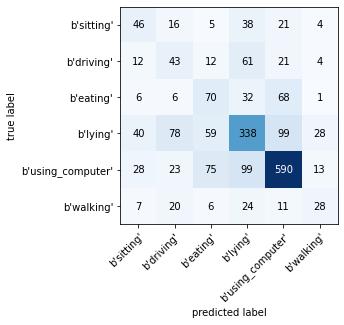

In [5]:
dt = DecisionTreeClassifier()

fin_pred = cross_val_predict(dt, x, y, cv=5)
print("Desicion Tree")
print(classification_report(y, fin_pred))

cm = confusion_matrix(y_target=y, 
            y_predicted=fin_pred, 
            binary=False)
fig,ax=plot_confusion_matrix(conf_mat=cm
            ,show_absolute=True
            ,show_normed=False
            ,colorbar=False
            ,class_names=feature_names
            #,cmap='PuBu'
            ,fontcolor_threshold=0.6
            )
plt.show()